<a href="https://colab.research.google.com/github/deeht0x/GraphCheck/blob/main/cs4375_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/wine.data'

column_names = [
    "Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols",
    "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue",
    "OD280/OD315 of diluted wines", "Proline"
]
wine_data = pd.read_csv(file_path, header=None, names=column_names)


In [5]:
# Select features and target
X = wine_data[['Color intensity']]  # Predictor (Color intensity)
y = wine_data['Alcohol']            # Target (Alcohol content)


In [6]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (SGDRegressor works better with scaled data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Create an SGDRegressor model
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=0.01)

# Fit the model to the training data
sgd_reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = sgd_reg.predict(X_test_scaled)

In [8]:
# Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output model parameters
intercept = sgd_reg.intercept_[0]
slope = sgd_reg.coef_[0]

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² score: {r2}")

Intercept: 12.979696672973022
Slope: 0.41692315140769787
Mean Squared Error (MSE): 0.3565387362088278
R² score: 0.40281849977119377


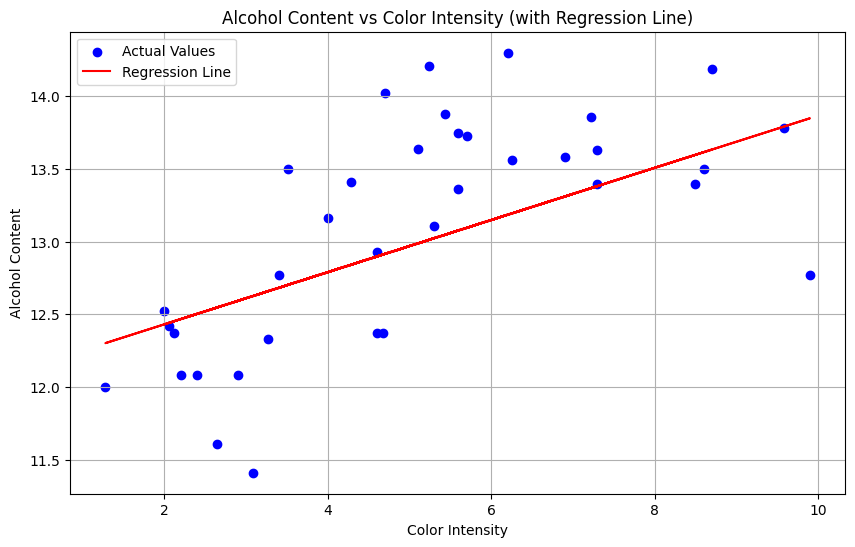

In [9]:
# 1. Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Color Intensity')
plt.ylabel('Alcohol Content')
plt.title('Alcohol Content vs Color Intensity (with Regression Line)')
plt.legend()
plt.grid(True)
plt.show()


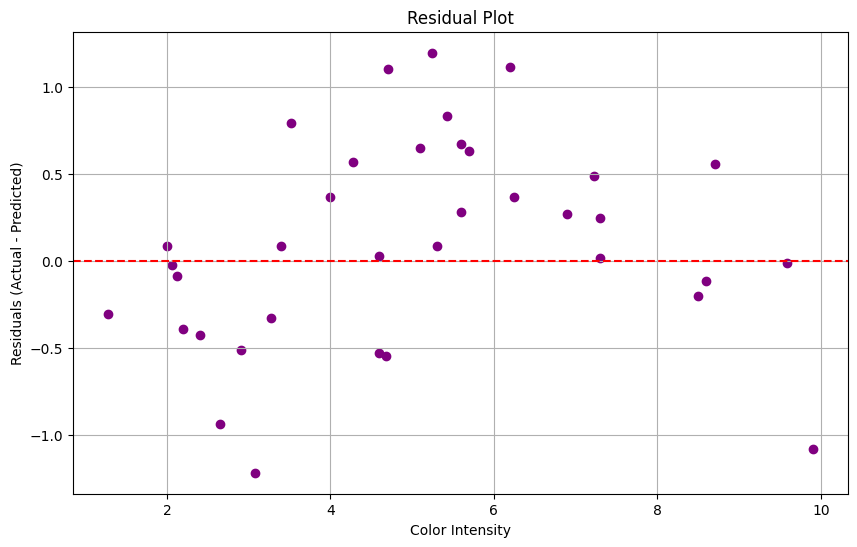

In [10]:
# 2. Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(X_test, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Color Intensity')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

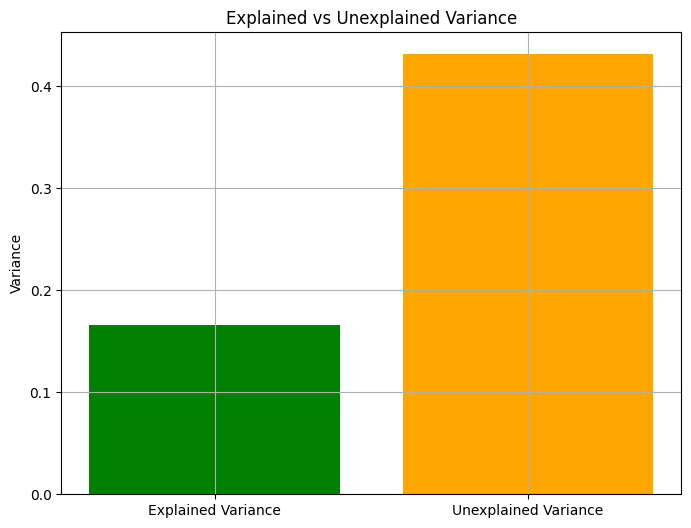

In [11]:
# Calculate total variance, explained variance, and unexplained variance
total_variance = np.var(y_test)
explained_variance = np.var(y_pred)
unexplained_variance = total_variance - explained_variance

# Create a bar plot to visualize explained variance
labels = ['Explained Variance', 'Unexplained Variance']
variances = [explained_variance, unexplained_variance]

plt.figure(figsize=(8, 6))
plt.bar(labels, variances, color=['green', 'orange'])
plt.ylabel('Variance')
plt.title('Explained vs Unexplained Variance')
plt.grid(True)
plt.show()